# Visualizaciones avanzadas

## Dados los conjuntos de datos de mortalidad de Canarias e indicadores de población crear un cuadro de mandos siguiendo las recomendaciones de diseño para gráficos y para cuadros de mando que integre información de ambos ficheros. Realizar los mismos gráficos usando _ggplot_ en un _notebook_.

In [60]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv('../data/DefCanariaStatTasa.csv').drop('Unnamed: 0', axis = 'columns')

display(df)

,Municipio,Año,Sexo,Tipo,Defunciones
0,Arrecife,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"37,28"
1,Haría,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"0,00"
2,San Bartolomé,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"21,09"
3,Teguise,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"17,14"
4,Tías,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"46,80"
...,...,...,...,...,...
9513,Tacoronte,2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"32,85"
9514,Tanque (El),2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"0,00"
9515,Tegueste,2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"0,00"
9516,Victoria de Acentejo (La),2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"0,00"


In [61]:
df['Municipio'] = df['Municipio'].str.strip()

In [62]:
# Eliminamos los puntos
df['Defunciones'] = df['Defunciones'].str.replace('.', '')

# Sustituimos los registros vacios con 0
df['Defunciones'] = df['Defunciones'].str.replace(pat = r"^$", repl = '0', regex = True)

# Sustituimos las comas por puntos
df['Defunciones'] = df['Defunciones'].str.replace(',', '.')

# Convertimos la columna a numérica
df['Defunciones'] = pd.to_numeric(df['Defunciones'])

In [63]:
display(df['Defunciones'].dtype)

dtype('float64')

In [64]:
df = df.groupby('Municipio').agg({'Defunciones': 'sum'}).reset_index()

In [65]:
display(df)

,Municipio,Defunciones
0,Adeje,2698.28
1,Agaete,5393.02
2,Agulo,4190.56
3,Agüimes,3352.48
4,Alajeró,2881.29
...,...,...
83,Vega de San Mateo,5705.76
84,Victoria de Acentejo (La),4974.52
85,Vilaflor,3993.80
86,Villa de Mazo,4721.34


In [66]:
gdf = gpd.read_file('../data/indicadores_poblacion_municipios.geojson')

gdf

,geographical_code,variable_element,label,layer,GEO_ID,indicadores_municipal_GRANULARITY,indicadores_municipal_PARENT,indicadores_municipal_CUMUN,indicadores_municipal_MUNICIPIO,indicadores_municipal_CUISLA,...,indicadores_municipal_SUPERFICIE_HA_IGN,indicadores_municipal_TOTAL_d,indicadores_municipal_Extranjeros_d,indicadores_municipal_Nac_Canarias,indicadores_municipal_Nac_ES_XCanarias,indicadores_municipal_Nac_Extranjero,indicadores_municipal_PC_Nac_Canarias,indicadores_municipal_PC_Nac_ES_XCanarias,indicadores_municipal_PC_Nac_Extranjero,geometry
0,35034,MUN_YAIZA,Yaiza,MUNICIPALITIES,35034,MUNICIPIO,ES708,35034,Yaiza,ES708,...,"21209,40","76,65","28,912",5121,3839,7297,"31,5","23,614","44,885","MULTIPOLYGON (((-13.69457 28.98678, -13.69850 ..."
1,35028,MUN_TIAS,Tías,MUNICIPALITIES,35028,MUNICIPIO,ES708,35028,T�as,ES708,...,"6432,05","310,383","121,548",8785,2651,8528,"44,004","13,279","42,717","MULTIPOLYGON (((-13.70047 28.91793, -13.70089 ..."
2,38038,MUN_SANTA_CRUZ_TENERIFE,Santa Cruz de Tenerife,MUNICIPALITIES,38038,MUNICIPIO,ES709,38038,Santa Cruz de Tenerife,ES709,...,"15044,00","1.353,98","66,944",155625,20083,27984,"76,402","9,859","13,738","MULTIPOLYGON (((-16.27476 28.57259, -16.27444 ..."
3,38048,MUN_VALVERDE,Valverde,MUNICIPALITIES,38048,MUNICIPIO,ES703,38048,Valverde,ES703,...,"10368,50","47,451","3,028",3713,336,871,"75,467","6,829","17,703","MULTIPOLYGON (((-17.96079 27.69245, -17.96750 ..."
4,35005,MUN_ARTENARA,Artenara,MUNICIPALITIES,35005,MUNICIPIO,ES705,35005,Artenara,ES705,...,"6641,90","16,501","0,075",1063,11,22,"96,989","1,004","2,007","MULTIPOLYGON (((-15.74959 27.98801, -15.75005 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,38036,MUN_SAN_SEBASTIAN_GOMERA,San Sebastián de La Gomera,MUNICIPALITIES,38036,MUNICIPIO,ES706,38036,San Sebasti�n de la Gomera,ES706,...,"11313,40","77,43","7,08",6856,537,1367,"78,265","6,13","15,605","MULTIPOLYGON (((-17.19498 28.02910, -17.19870 ..."
84,38037,MUN_SANTA_CRUZ_LA_PALMA,Santa Cruz de La Palma,MUNICIPALITIES,38037,MUNICIPIO,ES707,38037,Santa Cruz de la Palma,ES707,...,"4341,21","358,909","15,295",12490,1012,2079,"80,162","6,495","13,343","MULTIPOLYGON (((-17.75216 28.70539, -17.75264 ..."
85,35017,MUN_PUERTO_ROSARIO,Puerto del Rosario,MUNICIPALITIES,35017,MUNICIPIO,ES704,35017,Puerto del Rosario,ES704,...,"29077,10","133,132","19,108",22797,7270,8644,"58,89","18,78","22,33","MULTIPOLYGON (((-13.82862 28.56373, -13.82939 ..."
86,38023,MUN_SAN_CRISTOBAL_LAGUNA,San Cristóbal de La Laguna,MUNICIPALITIES,38023,MUNICIPIO,ES709,38023,San Crist�bal de La Laguna,ES709,...,"10245,20","1.499,78","74,562",125623,9154,18878,"81,757","5,958","12,286","MULTIPOLYGON (((-16.41127 28.52665, -16.41105 ..."


In [67]:
gdf = gdf.sort_values(by = 'indicadores_municipal_MUNICIPIO')

gdf['indicadores_municipal_MUNICIPIO'] = df.sort_values(by = 'Municipio')['Municipio'].unique()

In [68]:
summarized_df = gdf.merge(df, how = 'left', left_on = 'indicadores_municipal_MUNICIPIO', right_on = 'Municipio').filter([
    'indicadores_municipal_MUNICIPIO',
    'label',
    'indicadores_municipal_CUISLA',
    'Año',
    'Defunciones',
    'geometry'
])

In [69]:
summarized_df.query('label == "Betancuria"')

,indicadores_municipal_MUNICIPIO,label,indicadores_municipal_CUISLA,Defunciones,geometry
14,Betancuria,Betancuria,ES704,3641.97,"MULTIPOLYGON (((-14.05969 28.37746, -14.06104 ..."


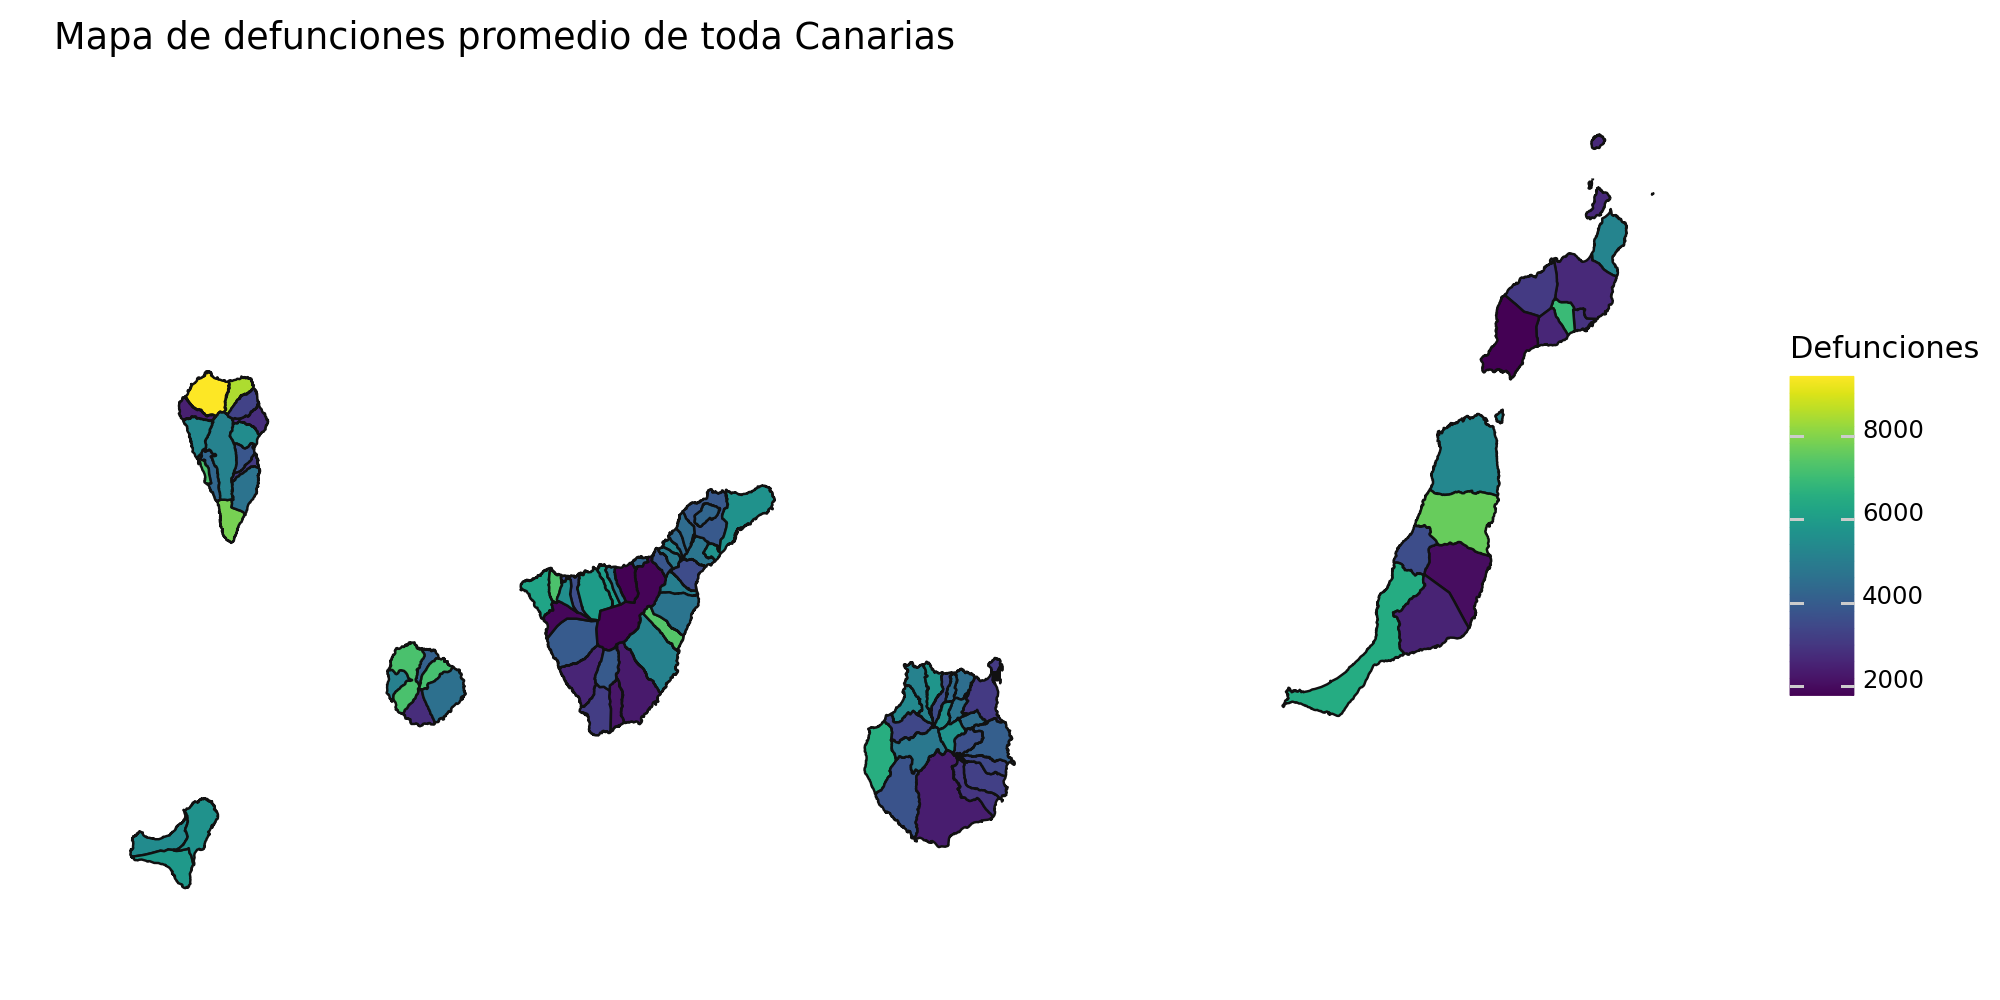

<Figure Size: (1000 x 500)>

In [70]:
from plotnine import *

(ggplot()
    + geom_map(summarized_df, aes(fill='Defunciones'))
    + labs(title = f'Mapa de defunciones promedio de toda Canarias')
    + theme(
        figure_size = (10, 5),
        panel_background = element_rect(fill = 'white'),
        axis_text_x = element_blank(),
        axis_text_y = element_blank(),
        axis_ticks_major_x = element_blank(),
        axis_ticks_major_y = element_blank()
    )
)